##Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1gnEmwyGy0LbTbJbAObG1GluWXj6wpHMD/[2024-2025] AN2DL/Homework 2


##Importing libraries

In [10]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


##Loading data

In [11]:
import numpy as np

data = np.load("mars_for_students.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]


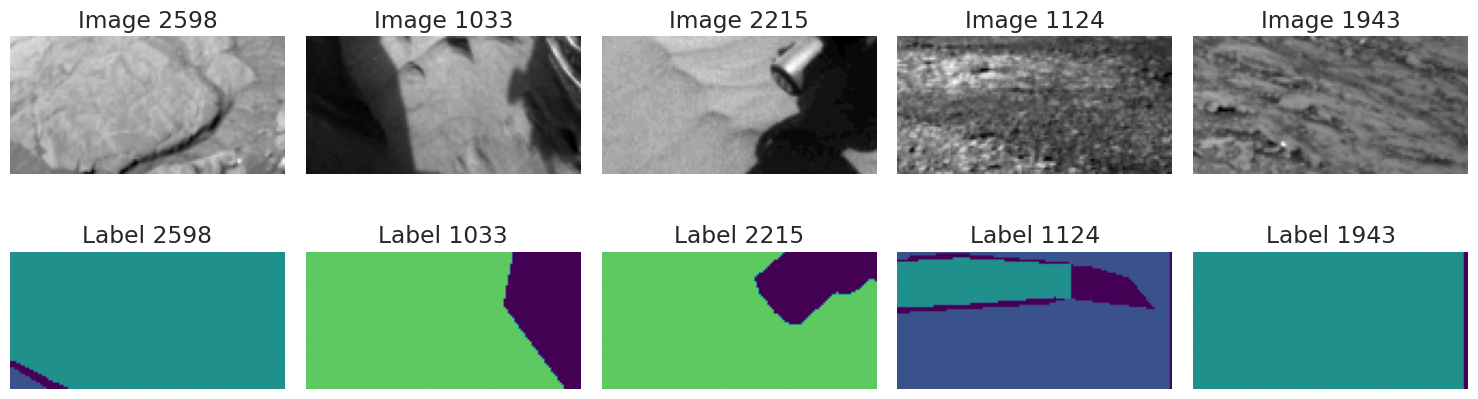

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot random images with labels
def plot_random_images_with_labels(images, labels, num=5):
    """
    Plot `num` random images with their corresponding label masks.

    Parameters:
        images (numpy.ndarray): Array of images.
        labels (numpy.ndarray): Array of label masks.
        num (int): Number of images to plot.
    """
    # Select `num` random indices
    random_indices = np.random.choice(len(images), num, replace=False)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        # Display the image
        plt.subplot(2, num, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Image {idx}")
        plt.axis("off")

        # Display the mask with viridis
        plt.subplot(2, num, i + 1 + num)
        plt.imshow(labels[idx], cmap='viridis', vmin=0, vmax=4)
        plt.title(f"Label {idx}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Plot 5 random images with labels
plot_random_images_with_labels(X_train, y_train, num=5)


##Data processing

In [13]:
import numpy as np

# Assuming X_train and y_train are already defined as in your previous code

def remove_duplicate_masks(X_train, y_train):
    """
    Counts the number of images in the dataset with the same mask as the 1006th image.
    Removes images with duplicate masks if the count is > 1.

    Args:
        X_train: The training images.
        y_train: The training masks.

    Returns:
        Tuple: Updated X_train and y_train with duplicate masks removed.
    """

    # Check if the index 1006 is valid
    if 1006 >= len(y_train):
        print("Error: Index 1006 is out of bounds for y_train.")
        return X_train, y_train

    target_mask = y_train[1005]
    duplicate_indices = []

    for i in range(len(y_train)):
      if np.array_equal(y_train[i], target_mask) and i != 1005:
          duplicate_indices.append(i)

    print(f"Number of images with the same mask as the 1006th image: {len(duplicate_indices)}")

    if len(duplicate_indices) > 0:
        # Remove duplicate images and masks
        X_train = np.delete(X_train, duplicate_indices, axis=0)
        y_train = np.delete(y_train, duplicate_indices, axis=0)
        print(f"Removed {len(duplicate_indices)} duplicate images.")
    else:
        print("No duplicate masks found.")

    return X_train, y_train

X_train, y_train = remove_duplicate_masks(X_train, y_train)

# Verify the updated shapes
print(f"New shape of X_train: {X_train.shape}")
print(f"New shape of y_train: {y_train.shape}")

Number of images with the same mask as the 1006th image: 109
Removed 109 duplicate images.
New shape of X_train: (2506, 64, 128)
New shape of y_train: (2506, 64, 128)


In [15]:
import numpy as np

training_set = np.stack((X_train, y_train), axis=1)

zip_filename = "filtered_mars_for_students.npz"
np.savez_compressed(zip_filename, training_set=training_set, test_set=X_test)

print(f'Data correctly saved in file {zip_filename}')

Data correctly saved in file filtered_mars_for_students.npz


In [ ]:
import numpy as np

data = np.load("filtered_mars_for_students.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]


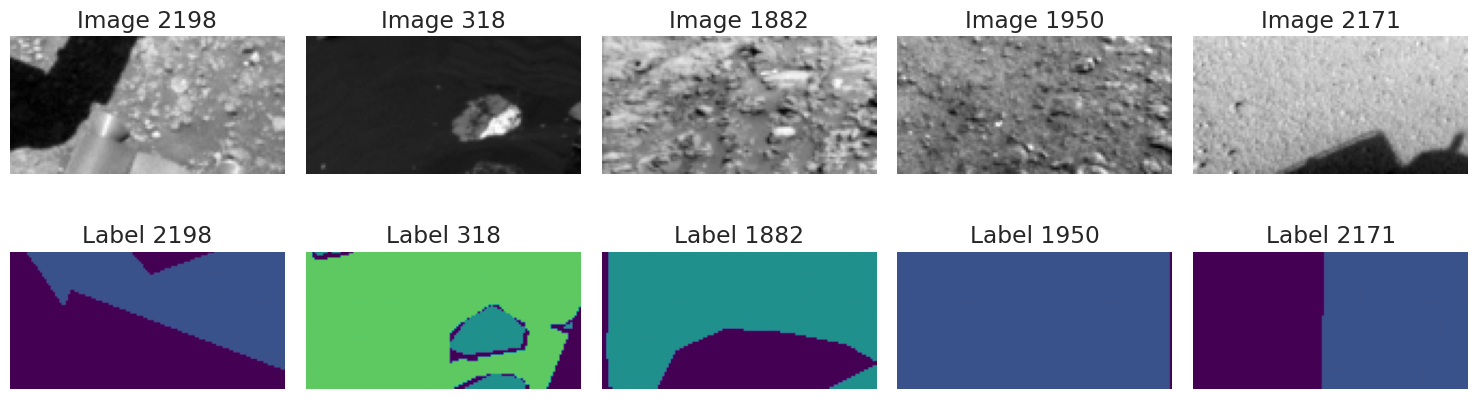

In [ ]:
plot_random_images_with_labels(X_train, y_train)